In [126]:
import requests
import json
import plotly.express as px
import pandas as pd
import json
from functools import lru_cache
import networkx as nx

# Visualizations

In [ ]:
url = "https://bug-hardy-obviously.ngrok-free.app"
version = "ram_1000_24"
timestamp = 1

final = f"{url}/archive/schema/{version}/{timestamp}"

url_data = requests.get(final)
if url_data.status_code == 200:
    data = json.loads(url_data.text)

https://bug-hardy-obviously.ngrok-free.app/archive/schema/ram_1000_24/1


In [56]:
data

{'error': 'Schema archive not found'}

In [70]:
# load a jsopn
data = json.loads(url_data.text)    

OSError: [Errno 22] Invalid argument: 'E:\\LAM\\Graph Server\\Querying_Dashboard - Copy\\data\\supply_chain_export_500\timestamp_0.json'

In [75]:
import json

with open("E:\\LAM\\Graph Server\\dataset\\supply_chain_export_500\\supply_chain_export\\timestamp_0.json", "r") as f:
    data = json.load(f)

print(data)

{'directed': True, 'multigraph': False, 'graph': {'date': '2024-01-01 00:00:00'}, 'node_types': {'BusinessGroup': ['node_type', 'name', 'description', 'revenue', 'id'], 'ProductFamily': ['node_type', 'name', 'revenue', 'id'], 'ProductOffering': ['node_type', 'name', 'cost', 'demand', 'id'], 'Supplier': ['node_type', 'name', 'location', 'reliability', 'size', 'size_category', 'supplied_part_types', 'id'], 'Warehouse': ['node_type', 'name', 'type', 'location', 'size_category', 'max_capacity', 'current_capacity', 'safety_stock', 'max_parts', 'id'], 'Facility': ['node_type', 'name', 'type', 'location', 'max_capacity', 'operating_cost', 'id'], 'Parts': ['node_type', 'name', 'type', 'subtype', 'cost', 'importance_factor', 'valid_from', 'valid_till', 'id']}, 'relationship_types': {'SupplierToWarehouse': ['relationship_type', 'transportation_cost', 'lead_time', 'source', 'target'], 'WarehouseToParts': ['relationship_type', 'inventory_level', 'storage_cost', 'source', 'target'], 'PartsToFacilit

In [77]:
data.keys()

dict_keys(['directed', 'multigraph', 'graph', 'node_types', 'relationship_types', 'node_values', 'relationship_values'])

In [78]:
data["node_values"].keys()

dict_keys(['BusinessGroup', 'ProductFamily', 'ProductOffering', 'Supplier', 'Warehouse', 'Facility', 'Parts'])

In [79]:
supplier_data = data["node_values"]["Supplier"]

In [81]:
place_freq

{'Washington': 10,
 'New York': 7,
 'California': 9,
 'Georgia': 4,
 'Massachusetts': 11,
 'Oregon': 10,
 'Arizona': 6,
 'Florida': 10,
 'Texas': 7}

In [ ]:
# df = pd.DataFrame(list(place_freq.items()), columns=['State', 'Value'])

def get_visualization(data):
    supplier_data = data["node_values"]["Supplier"]
    
    place_freq = {}
    items_freq = {}

    for i in supplier_data :
        place = i[2]
        if place in place_freq :
            place_freq[place] += 1
        else :
            place_freq[place] = 1

        for items in i[6] :
            if items in items_freq :
                items_freq[items] += 1
            else :
                items_freq[items] = 1

    state_abbreviations = {
        'Washington': 'WA',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Oregon': 'OR',
        'Texas': 'TX',
        'New York': 'NY',
        'Massachusetts': 'MA',
        'California': 'CA',
        'Arizona': 'AZ'
    }

    # Create a DataFrame and add state abbreviations
    df = pd.DataFrame(place_freq.items(), columns=['State', 'Value'])
    df['State_Abbreviation'] = df['State'].map(state_abbreviations)

    # Create the choropleth map
    fig1 = px.choropleth(
        df,
        locations='State_Abbreviation',  # Use abbreviations
        locationmode="USA-states",       # Use USA states mode
        color='Value',                   # Column to determine color
        scope="usa",                     # Focus on USA
        color_continuous_scale="Blues",  # Color scale
        labels={'Value': 'Supplier Count'}, # Customize label
        title='Concentration of Suppliers'
    )

    # Update layout for better appearance
    fig1.update_layout(
        title_text='Concentration of Suppliers',
        geo=dict(
            showlakes=True,  # Show lakes
            lakecolor='rgb(255, 255, 255)'  # Lake color
        )
    )

    # Show the figure
    # fig1.show()

    df = pd.DataFrame.from_dict(items_freq, orient='index', columns=['Frequency'])
    df = df.reset_index().rename(columns={'index': 'Item'})

    # Create the bar chart with blue color
    fig2 = px.bar(df, x='Item', y='Frequency', title='Number of suppliers per item')
    fig2.update_traces(marker_color='blue')

    return [fig1, fig2]


In [ ]:
fig1,fig2 = get_visualization(data) # data should be the json data for a partivular timestamp
fig1.show()
fig2.show()

In [91]:
items_freq

{'metal_sheet': 37,
 'metal_rod': 32,
 'chemical': 29,
 'plastic_component': 35,
 'electronic_component': 32,
 'circuit_board': 7,
 'power_unit': 9,
 'housing_unit': 8,
 'control_panel': 4,
 'sensor_array': 6}

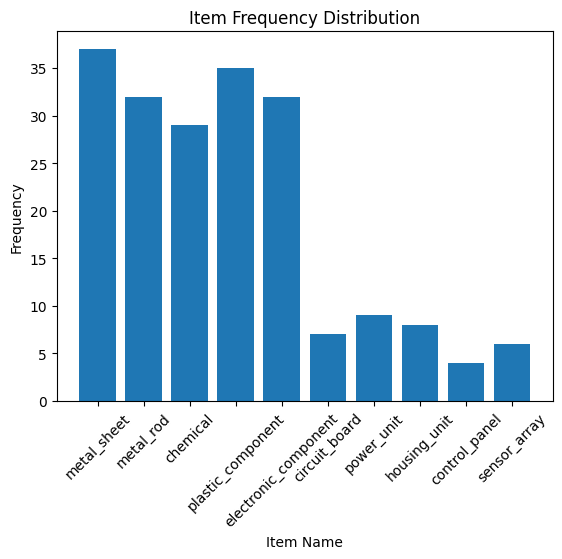

In [92]:
import matplotlib.pyplot as plt

items = list(items_freq.keys())
frequencies = list(items_freq.values())

# Create the bar chart
plt.bar(items, frequencies)
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title('Item Frequency Distribution')
plt.xticks(rotation=45)  # Rotate item names for better readability
plt.show()

In [93]:
df = pd.DataFrame.from_dict(items_freq, orient='index', columns=['Frequency'])
df = df.reset_index().rename(columns={'index': 'Item'})

# Create the bar chart
fig = px.bar(df, x='Item', y='Frequency', title='Item Frequencies')
fig.show()

# Temporal

In [137]:
base_url = "https://bug-hardy-obviously.ngrok-free.app"
version = "NSS_1000_12"

getVersions = f"{base_url}/versions"
getTimestamp = f"{base_url}/archive/schema/{version}"
getdata = f"{base_url}/archive/schema/{version}"

In [139]:
data = requests.get(getTimestamp).json()
totalTimeStamps = len(data)
totalTimeStamps

11

In [141]:
files = []
for i in range(1,totalTimeStamps+1) :
    files.append(f"{getdata}/{i}")

In [143]:
files

['https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/1',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/2',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/3',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/4',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/5',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/6',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/7',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/8',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/9',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/10',
 'https://bug-hardy-obviously.ngrok-free.app/archive/schema/NSS_1000_12/11']

In [178]:
# load the files[0]
data = requests.get(files[0]).json()

# load the json file
import json
type(data)
data.keys()

dict_keys(['directed', 'multigraph', 'graph', 'node_types', 'relationship_types', 'node_values', 'link_values'])

In [179]:
data["directed"]

True

In [209]:
graph = nx.DiGraph()

In [211]:
for node_type, nodes in data["node_values"].items():
    for node in nodes:
        node_id = node[-1]
        node_attributes = dict(zip(data["node_types"][node_type], node))
        graph.add_node(node_id, **node_attributes)

all_edge_types = data["relationship_types"]
for link_type,link_values in data["link_values"].items():
    for edge_data in link_values :
        attributes = {}
        for j in range(len(edge_data) - 2):
            key = all_edge_types[link_type][j]
            attributes[key] = edge_data[j]
        graph.add_edge(edge_data[-2], edge_data[-1], **attributes)


In [212]:
graph.number_of_edges()

4539

In [213]:
graph.number_of_nodes()

1025

In [202]:
import json
from functools import lru_cache
import networkx as nx

class TemporalGraphClass:
    def __init__(self, files):
        self.files = files  # List of JSON file paths

    @lru_cache(maxsize=10)
    def load_graph_at_timestamp(self, timestamp):
        data = requests.get(files[timestamp]).json()
        return self._json_to_graph(data)

    def _json_to_graph(self, data):
        graph = nx.DiGraph() if data["directed"] else nx.Graph()
        for node_type, nodes in data["node_values"].items():
            for node in nodes:
                node_id = node[-1]
                node_attributes = dict(zip(data["node_types"][node_type], node))
                graph.add_node(node_id, **node_attributes)

        all_edge_types = data["relationship_types"]
        for link_type,link_values in data["link_values"].items():
            for edge_data in link_values :
                attributes = {}
                for j in range(len(edge_data) - 2):
                    key = all_edge_types[link_type][j]
                    attributes[key] = edge_data[j]
                graph.add_edge(edge_data[-2], edge_data[-1], **attributes)

        return graph

In [204]:
obj = TemporalGraphClass(files)

In [206]:
graph = obj.load_graph_at_timestamp(1)

In [207]:
graph